In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from lib import DihedralAdherence
from lib import PDBMineQuery
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from pathlib import Path
PDBMINE_URL = os.getenv("PDBMINE_URL")
PROJECT_DIR = 'casp_da'
import torch
from torch import nn
import torch.nn.functional as F

Initializing T1082 ...
Results already exist
Casp ID: T1082 	PDB: 7cn6
Structure exists: 'pdb/pdb7cn6.ent' 
No AlphaFold prediction found for 7cn6
No AlphaFold phi-psi data found
Slope: 0.11166312609208276, Intercept: 2.079224129184083


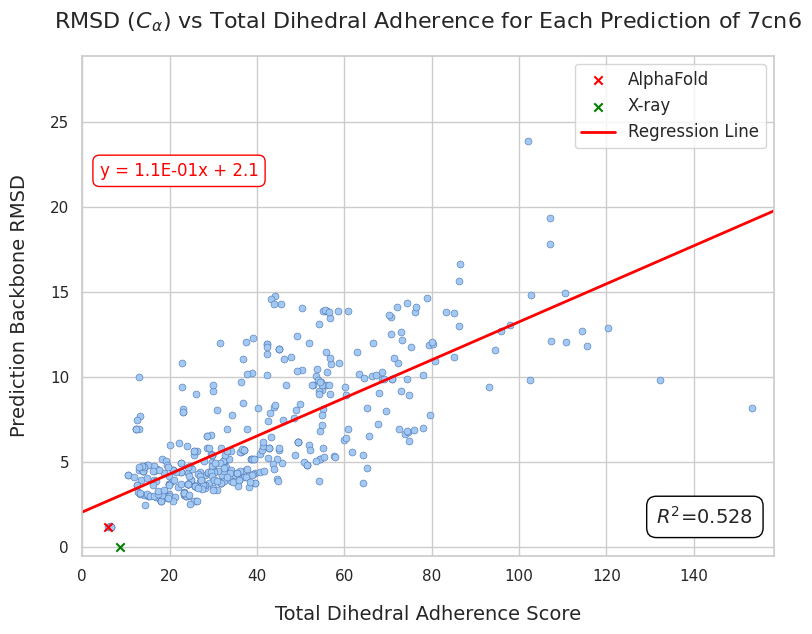

In [3]:
proteins = ['T1024', 'T1096', 'T1027', 'T1082', 'T1091', 'T1058', 'T1049', 'T1030', 'T1056', 'T1038', 'T1025', 'T1028']
da = DihedralAdherence(
    proteins[3], [4,5,6,7], PDBMINE_URL, PROJECT_DIR, mode='ml',
    weights_file='ml_data/best_model_kde_64-64_390.pt', device='cuda')
# da.load_results()
da.load_results_da()
da.plot_da_vs_rmsd_simple()
# da.plot_dist_kde()
# da.plot_res_vs_da(pred_id=da.protein_ids[2])
# da.compute_das(replace=True)
# da.plot_da_for_seq(da.overlapping_seqs[1])

In [5]:
proteins = ['T1024', 'T1096', 'T1027', 'T1082', 'T1091', 'T1058', 'T1049', 'T1030', 'T1056', 'T1038', 'T1025', 'T1028']
da = DihedralAdherence(
    proteins[3], [4,5,6,7], PDBMINE_URL, PROJECT_DIR, mode='ml',
    weights_file='ml_data/best_model_kde_64-64_390.pt', device='cuda')
# da.load_results()
da.load_results_da()
da.plot_da_vs_rmsd_simple()
# da.plot_dist_kde()
# da.plot_res_vs_da(pred_id=da.protein_ids[2])
# da.compute_das(replace=True)
# da.plot_da_for_seq(da.overlapping_seqs[1])

Initializing T1082 ...
Results already exist
Casp ID: T1082 	PDB: 7cn6
Structure exists: 'pdb/pdb7cn6.ent' 
No AlphaFold prediction found for 7cn6
No AlphaFold phi-psi data found


AttributeError: 'DataFrame' object has no attribute 'GDT_TS'

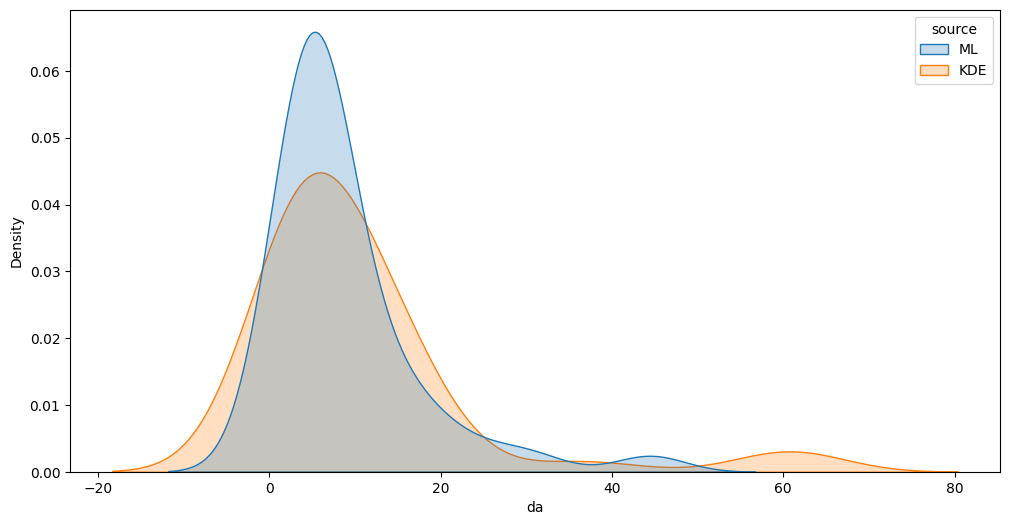

In [46]:
xray_phi_psi = pd.read_csv(da.outdir / 'xray_phi_psi_da_ml.csv')
xray_phi_psi['source'] = 'ML'
xray_phi_psi2 = pd.read_csv(da.outdir / 'xray_phi_psi_da_af.csv')
xray_phi_psi2['source'] = 'KDE'
df = pd.concat([xray_phi_psi, xray_phi_psi2], axis=0).reset_index(drop=True)
sns.set_palette('tab10')
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data=df, x='da', fill=True, ax=ax, common_norm=False, hue='source')
plt.show()

In [24]:
proteins = ['T1024', 'T1096', 'T1027', 'T1082', 'T1091', 'T1058', 'T1049', 'T1030', 'T1056', 'T1038', 'T1025', 'T1028']
mls = []
kdes = []
for protein in proteins:
    da = DihedralAdherence(
    protein, [4,5,6,7], PDBMINE_URL, PROJECT_DIR, mode='ml',
    weights_file='ml_data/best_model_kde_64-64_390.pt', device='cuda')
    da.load_results_da()
    xray_ml = da.xray_phi_psi
    xray_kde = pd.read_csv(da.outdir / 'xray_phi_psi_da_af.csv')
    xray_ml['source'] = 'ML'
    xray_kde['source'] = 'KDE'

    mls.append(xray_ml)
    kdes.append(xray_kde)

mls = pd.concat(mls, axis=0).reset_index(drop=True)
kdes = pd.concat(kdes, axis=0).reset_index(drop=True)

Initializing T1024 ...
Results already exist
Casp ID: T1024 	PDB: 6t1z
Structure exists: 'pdb/pdb6t1z.ent' 
Initializing T1096 ...
Results already exist
Casp ID: T1096 	PDB: 7um1
Structure exists: 'pdb/pdb7um1.ent' 
No AlphaFold prediction found for 7um1
No AlphaFold phi-psi data found
Initializing T1027 ...
Results already exist
Casp ID: T1027 	PDB: 7d2o
Structure exists: 'pdb/pdb7d2o.ent' 
Initializing T1082 ...
Results already exist
Casp ID: T1082 	PDB: 7cn6
Structure exists: 'pdb/pdb7cn6.ent' 
No AlphaFold prediction found for 7cn6
No AlphaFold phi-psi data found
Initializing T1091 ...
Results already exist
Casp ID: T1091 	PDB: 7w6b
Structure exists: 'pdb/pdb7w6b.ent' 
No UniProt mapping found for 7w6b
No AlphaFold phi-psi data found
Initializing T1058 ...
Results already exist
Casp ID: T1058 	PDB: 7abw
Structure exists: 'pdb/pdb7abw.ent' 
Initializing T1049 ...
Results already exist
Casp ID: T1049 	PDB: 6y4f
Structure exists: 'pdb/pdb6y4f.ent' 
Initializing T1030 ...
Results alrea

In [25]:
mls.sort_values('da', inplace=True)

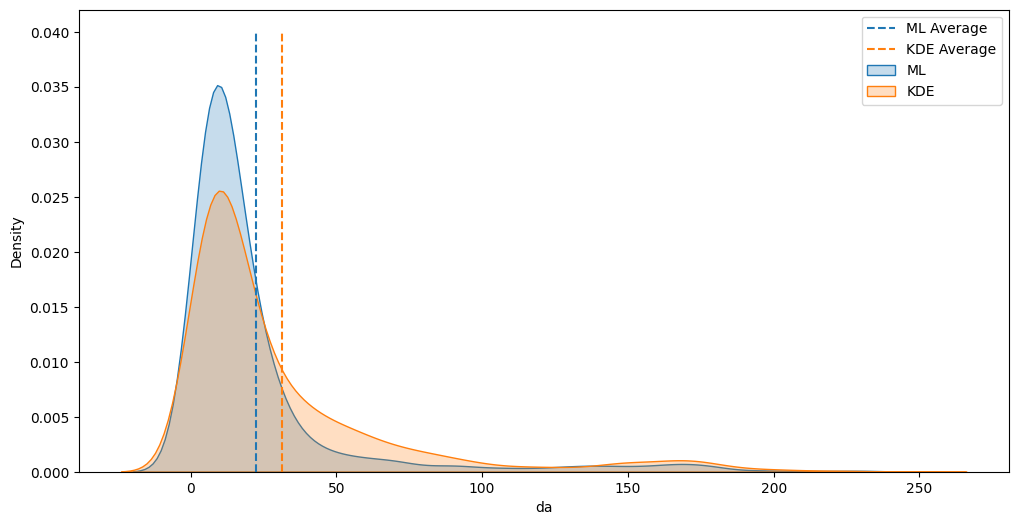

In [44]:
df = pd.concat([mls, kdes], axis=0).reset_index(drop=True)
fig, ax = plt.subplots(figsize=(12, 6))
ax.vlines(mls.da.mean(), 0, 0.04, color='tab:blue', linestyle='--', label='ML Average')
ax.vlines(kdes.da.mean(), 0, 0.04, color='tab:orange', linestyle='--', label='KDE Average')
sns.kdeplot(data=mls, x='da', fill=True, ax=ax, label='ML', color='tab:blue')
sns.kdeplot(data=kdes, x='da', fill=True,  ax=ax, label='KDE', color='tab:orange')
ax.legend()